# Convolutional Neural Network

This project uses Keras Library to build a Convolutional Neural Network to train with Dog and Cats. The objective of the model is to be able to predict with a good probability score to identify if a showed image is a cat or a dog


Lets get Building.

First Step is to import all the libraries.
* Installing Theano
* Insalling TensorFlow
* Installing Keras


1. In a CNN, the training and testing could be done on inputs such as images or sounds. It is an awesome model that could be used for a variety of cool projects. In this case as explained earlier, we would be training the model on 4000 images of Cats and 4000 images of Dogs.

2. Next we would be using 1000 images of Cats and 1000 images of Dogs as our Test Set. 

3. So in essence, we have 10000 images with 50% each of Dogs and Cats and we have a 80% split of these categories as Train set.

4. Because the data is not a table or a csv, preprocessing step for a CNN would be to make sure the names of all the images are unique and in a categorical order. S0 all the Cat images should be named something like CAT0001.JPG, CAT0002.JPG ..... CAT5000.JPG. 

5. Similary for the Dogs, we should have DOG0001.jpg,DOG0002.JPG..... DOG5000.JPG.

6. This is essential because this is the easy way in which we can make the model read the file names and process them sequentially during training or testing


In [1]:
# Convolutional Neural Network

# Installing Theano
!pip install --upgrade --no-deps git+git://github.com/Theano/Theano.git

# Installing Tensorflow
!pip install tensorflow

# Installing Keras
!pip install --upgrade keras

  Cloning git://github.com/Theano/Theano.git to c:\users\rames\appdata\local\temp\pip-zhdj3689-build


  Error [WinError 2] The system cannot find the file specified while executing command git clone -q git://github.com/Theano/Theano.git C:\Users\rames\AppData\Local\Temp\pip-zhdj3689-build
Cannot find command 'git'


Requirement already up-to-date: keras in c:\users\rames\anaconda3\lib\site-packages
Requirement already up-to-date: scipy>=0.14 in c:\users\rames\anaconda3\lib\site-packages (from keras)
Requirement already up-to-date: numpy>=1.9.1 in c:\users\rames\anaconda3\lib\site-packages (from keras)
Requirement already up-to-date: six>=1.9.0 in c:\users\rames\anaconda3\lib\site-packages (from keras)
Requirement already up-to-date: pyyaml in c:\users\rames\anaconda3\lib\site-packages (from keras)


## Methodology of a CNN

A Convolutional Neural Network has 4 major parts
### 1. The first part is Convolution Layer

In this part, the input images are converted into a bunch of pixel values and convolution is applied on them. That means that the pixels are convolved or transformed using a  bunch of feature detectors or filters to create a bunch of feature maps for each image. This is also the part where image gets reduced in terms of dimentionality to make the size smaller without losing any of the important feature.

Now, depending upon the filter applied, we will lose some information. But the key is to choose proper filter that cause reduction in dimentionality with too much loss of features.

Lets import the necessary libraries.
1. Sequential - This library is used for initiating the CNN layers as a sequence of layers. 
2. Convolution2d - This has functions that make the process easy to add all the elements of convolutional layer (bunch of feature maps)
    * Inputs are a set of parameters for CNN
    * Number of feature detectors (num of filters)
    * Number of rows and columns of each feature detector
    * border_detector
    * Input shape - the shape of imput image on which the cnn is applied to.
        1. Our images will not be the same to begin with so we have to convert them to change to a certain format.
        2. If we have a color image then these are converted into three layers for R,G and B colors. If however, we have a black and white image then we have only 1 layer. 
        3. So the Imput shape would be 3 layers and an image size could be 256 vs 256 pixels.
    * Activation Function - We would be using a ReLU activation function to ensure we do not lose non-linearity

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

# Initialising the CNN
classifier = Sequential()

# Here our images are colour images. So from a data perspective a colour image has three dimentions in R,G and B

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

Using TensorFlow backend.


## 2. Pooling Layer

1. Pooling is a way of further reducing the dimentionality of feature map.
2. We slide a certain predefined sub table (usually 2x2) across the feature map and apply pooling function.
3. Pooling function could be max,average or sum.
4. We apply the pooling on each of the feature maps to get a "pooling layer"

If we do not apply the pooling, our input layer would be very large leading to very heavy computational resources requirement and time complexity without loosing spatial structure information.
Here I would be using Max function for pooling.

In [3]:
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

In my previous test run of this code with one convolution layer, I got an accuracy score of 73%. In order to improve the performance and to get accuracy around 90%, lets add a convolution layer along with another pooling layer.
This makes the computation very resource intensive, so do not want to add more layers. Currently running the program on GPU.


In [4]:
# Second Convolution Layer and since the input to this layer is the output of the pooled layer, 
# we do not need to add the input_shape

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

## 3. Flattening

THis step involves all of our input pooling layer and convert this to a single vector. This vector would be quite large since it contains all the features from all of our pooled layers.

This flattened layer is next applied as an input layer to a Neural Network.

By applying the feature detectors to create the feature maps and maxpooling we gain three advantages:
1. We reduce the dimentions, so our flattened layers that are the input to the NN are much smaller than the original pixel information.
2. We retain the information of one pixel relative to the other pixels
3. We retain the information of important feature of each image. For example we retain the difference in features of cats and dogs for example say droopy ears versus non droopy ears.

In [5]:
# Step 3 - Flattening
classifier.add(Flatten())

## 4. Artificial Neural network

This is the final part. This is called the full connection step. Here we connect the flattened vector as an input to the ANN. ANN is a good choice here because it is a great classification for non linear inputs like images.

The number od nodes in the hidden layer is based on experimentation. Here the logic of choosing 128 nodes for hidden layer is because our input image was of order 256x256.

Adding too little nodes will lose accuracy, but choosing too high would make it computationally intensive

Activation function for hte hidden layer input is Relu and since we are predicting two classes we can choose sigmoid as our output activation function

In [6]:
# Step 4 - Full connection - Adding one hidden layer only
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

### Compiling all the layers

Now that we have created all the steps of building process of CNN, we can compile the CNN.
1. Optimizer algorithm parameter
2. Loss function Parameter - BinaryCrossEntropy for 2 CategoricalCross entropy for more than 2
3. Performace Mertric Parameter - I am choosing Accuracy metric to keep it simple

In [7]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Fitting our CNN to images

Now that design of CNN is complete, we need to do
1. Image Augmentation - Preprocessing of images to prevent overfitting.
    * ImageDataGenerator function - How does this prevent Overfitting?
        1. In the case where we have fewer images to do training on, our model finds some errornous correlations or fails to find hthe same correlations in the test data. 
        2.  This creates many batches of our images and applies random transformation such as rotating or inverting the images, which can now be used as training dataset. 
        3. In summary the augmentation allows to enrich our train dataset without adding more images.
        4. Image rescaling - this is necessary to convert all our input images to the same scale.
        5. Shearing - Geometric transformation of image where we rotate all the pixels in the same directions.

2. Creating training set of all our data plus the augmented images and also test set

3. Fitting the model created.

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# THis is the code for augmenting the input images. Using Shearing, xooms and horizontal flips
# for creating our augmented training data set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

# Here we are applying hte transformation to the test dataset. For test set we do 
# not have to apply any transformation since we are measuring accuracy of the model
test_datagen = ImageDataGenerator(rescale = 1./255)


# Here we are creating the training dataset
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
# Here we are creating the test dataset
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'binary')

# Finally fitting the cnn
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/25
8000/8000 [==============================] - 4762s - loss: 0.3273 - acc: 0.8478 - val_loss: 0.5317 - val_acc: 0.8184
Epoch 2/25
8000/8000 [==============================] - 4475s - loss: 0.1120 - acc: 0.9572 - val_loss: 0.7270 - val_acc: 0.8148
Epoch 3/25
8000/8000 [==============================] - 4364s - loss: 0.0650 - acc: 0.9761 - val_loss: 0.7528 - val_acc: 0.8226
Epoch 4/25
8000/8000 [==============================] - 4660s - loss: 0.0458 - acc: 0.9836 - val_loss: 0.8927 - val_acc: 0.8214
Epoch 5/25
8000/8000 [==============================] - 4743s - loss: 0.0358 - acc: 0.9875 - val_loss: 0.9356 - val_acc: 0.8266
Epoch 6/25
8000/8000 [==============================] - 4718s - loss: 0.0297 - acc: 0.9897 - val_loss: 0.9626 - val_acc: 0.8167
Epoch 7/25
8000/8000 [==============================] - 4711s - loss: 0.0244 - acc: 0.9920 - val_loss: 1.0149 - val_acc: 0.8129
Epoch 8/25
8000/8000

### Now that our model is trained, lets make some prediction

In our dataset we have a few images for test.

1. cat_or_dog_1.jpg -- This is a dog
2. cat_or_dog_2.jpg -- This is a cat

Lets take a look at each of these images first

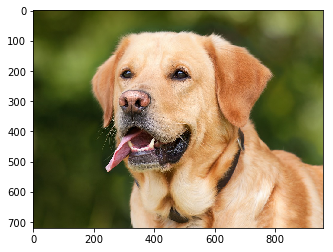

In [9]:
# Image 1 -- This is a dog

from keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
%matplotlib inline

path = "dataset/single_prediction/cat_or_dog_1.jpg"

img = load_img(path)
plt.imshow(img)

In order for us to make predictions_on the above images, we need to do some preprocessing on the above images. 
1. First, we need to convert them into a numpy array
2. Next we need to load these images on to a variable in exactly the same size as our training set
3. Third, In order for us to be able to predict the outcome, we need to convert the image into necessary dimensions.
4. Finally apply the predict function on the test_image to predict.
Lets have some fun


In [19]:
import numpy as np
from keras.preprocessing import image

# Loading the image with the exact target size as training images
test_image=image.load_img('dataset/single_prediction/cat_or_dog_1.jpg',target_size=(128, 128))

# Expanging the dimensions to match what is needed for predicting
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


# Applying the predict function using our trained model
result=classifier.predict(test_image)

# Here the result is going to be a 1 or a 0, but for us to know which one is 1 and which is 0
print(training_set.class_indices)


if int(result[0][0])==1:
    prediction='dog'
else:
    prediction='cat'

print(prediction)

{'cats': 0, 'dogs': 1}
dog


### Predicting the image below of a cat

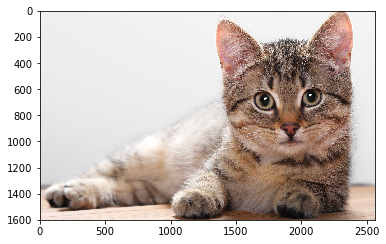

In [25]:
# Image 2 - This is a cat

path = "dataset/single_prediction/cat_or_dog_2.jpg"

img = load_img(path)
plt.imshow(img)

In [18]:
# Doing the same for second image

# Loading the image with the exact target size as training images
test_image=image.load_img('dataset/single_prediction/cat_or_dog_2.jpg',target_size=(128, 128))

# Expanging the dimensions to match what is needed for predicting
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


# Applying the predict function using our trained model
result=classifier.predict(test_image)

# Here the result is going to be a 1 or a 0, but for us to know which one is 1 and which is 0
print(training_set.class_indices)


if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

print(prediction)

{'cats': 0, 'dogs': 1}
cat


### Predicting the image of a chihuahua

This is a tough picture to predict. As you can see from the image, the features of a dog are bit less pronounced in this chihuahua. It has erect ears like a cat and a smaller facial profile.

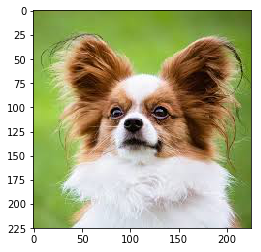

In [26]:
# Image 2 - This is a cat

path = "dataset/single_prediction/chihuahua.jpg"

img = load_img(path)
plt.imshow(img)

In [20]:
# Doing the same for image of a chihuahua

# Loading the image with the exact target size as training images
test_image=image.load_img('dataset/single_prediction/chihuahua.jpg',target_size=(128, 128))

# Expanging the dimensions to match what is needed for predicting
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


# Applying the predict function using our trained model
result=classifier.predict(test_image)

# Here the result is going to be a 1 or a 0, but for us to know which one is 1 and which is 0
print(training_set.class_indices)


if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

print(prediction)

{'cats': 0, 'dogs': 1}
cat


### Predicting from a image of a Daschund

This is again a difficult image to predict on. None of the images in the train set had a daschund. SO the model is coming across this type of a dog for the first time. However, there are some good profile features of a dog like that thin tail, droopy ears.

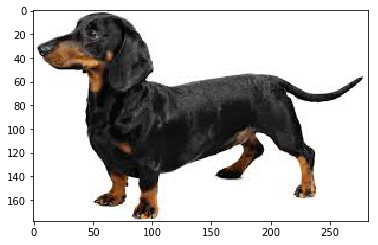

In [27]:
# Image 2 - This is a cat

path = "dataset/single_prediction/daschund.jpg"

img = load_img(path)
plt.imshow(img)

In [21]:
# Doing the same for second image

# Loading the image with the exact target size as training images
test_image=image.load_img('dataset/single_prediction/daschund.jpg',target_size=(128, 128))

# Expanging the dimensions to match what is needed for predicting
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


# Applying the predict function using our trained model
result=classifier.predict(test_image)

# Here the result is going to be a 1 or a 0, but for us to know which one is 1 and which is 0
print(training_set.class_indices)


if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

print(prediction)

{'cats': 0, 'dogs': 1}
dog


### Predicting Freya - the royal cat

This cat moves with british royalty and it is their house pet. This image is that of more generic cat (although a fiesty one!). So this must be easy for the model for predict

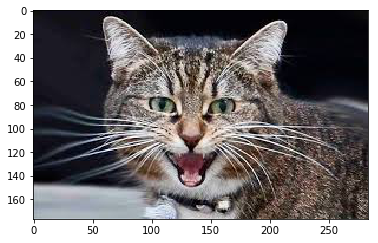

In [28]:
# Image 2 - This is a cat

path = "dataset/single_prediction/freya.jpg"

img = load_img(path)
plt.imshow(img)

In [23]:


# Loading the image with the exact target size as training images
test_image=image.load_img('dataset/single_prediction/freya.jpg',target_size=(128, 128))

# Expanging the dimensions to match what is needed for predicting
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


# Applying the predict function using our trained model
result=classifier.predict(test_image)

# Here the result is going to be a 1 or a 0, but for us to know which one is 1 and which is 0
print(training_set.class_indices)


if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

print(prediction)

{'cats': 0, 'dogs': 1}
cat


### Predicting Larry - Another Royal Cat

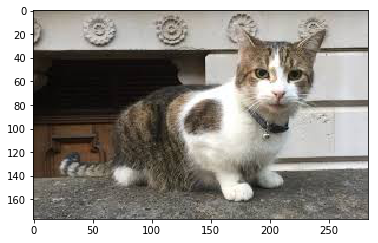

In [29]:
# Image 2 - This is a cat

path = "dataset/single_prediction/larry.jpg"

img = load_img(path)
plt.imshow(img)

In [30]:
# Doing the same for second image

# Loading the image with the exact target size as training images
test_image=image.load_img('dataset/single_prediction/larry.jpg',target_size=(128, 128))

# Expanging the dimensions to match what is needed for predicting
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


# Applying the predict function using our trained model
result=classifier.predict(test_image)

# Here the result is going to be a 1 or a 0, but for us to know which one is 1 and which is 0
print(training_set.class_indices)


if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

print(prediction)

{'cats': 0, 'dogs': 1}
dog


### Predicting Smoothie - another good looking Cat

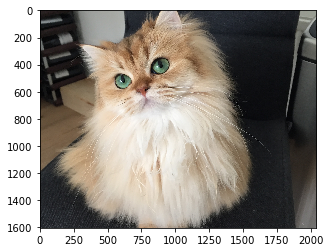

In [31]:
# Image 2 - This is a cat

path = "dataset/single_prediction/smoothie.jpg"

img = load_img(path)
plt.imshow(img)

In [32]:
# Doing the same for second image

# Loading the image with the exact target size as training images
test_image=image.load_img('dataset/single_prediction/smoothie.jpg',target_size=(128, 128))

# Expanging the dimensions to match what is needed for predicting
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


# Applying the predict function using our trained model
result=classifier.predict(test_image)

# Here the result is going to be a 1 or a 0, but for us to know which one is 1 and which is 0
print(training_set.class_indices)


if result[0][0]==1:
    prediction='dog'
else:
    prediction='cat'

print(prediction)

{'cats': 0, 'dogs': 1}
cat


### Taking it to the next level

Keras has more models developed on more than 1000's of animal categories. This library called "ResNet50" predicts not just the animal but also the breed of the animal.
For example : Smoothie is a Persian Cat. SO the ResNet model is able to predict not just that it is a cat but also that it is a Persian Cat.

Thats amazing!!!

In [37]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input, decode_predictions
model = ResNet50(weights='imagenet')

img_path = 'dataset/single_prediction/smoothie.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('\n'+'Predicted:', decode_predictions(preds, top=3)[0][0])


Predicted: ('n02123394', 'Persian_cat', 0.94066691)


### Lets re-predict Larry the Royal Cat using the ResNet model

Aparantly this model also predicts the image as a sheep dog... Maybe it has something with the image not being too clear

In [40]:
model = ResNet50(weights='imagenet')

img_path = 'dataset/single_prediction/larry.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('\n'+'Predicted:', decode_predictions(preds, top=3)[0][0])


Predicted: ('n02105641', 'Old_English_sheepdog', 0.34254724)


### Lets re-predict the chihuahua using the ResNet model


Wow!!! I learned something ... I thought he image chihuahua was a chihuahua.. Aparantly it is not a chihuahua but a Papillon Dog

In [41]:
model = ResNet50(weights='imagenet')

img_path = 'dataset/single_prediction/chihuahua.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('\n'+'Predicted:', decode_predictions(preds, top=3)[0][0])


Predicted: ('n02086910', 'papillon', 0.99856758)
